# **Logistics Regression - Assignment Questions:-**

## **Theoretical:**

1. What is Logistic Regression, and how does it differ from Linear Regression?

- **Logistic Regression** is a **supervised learning algorithm** used for **classification problems**, especially **binary classification** (e.g., spam vs. not spam, disease vs. no disease).

- It estimates the **probability** that an instance belongs to a class using the **sigmoid (logistic) function**, which maps predictions to a **\[0, 1]** range.


| Feature                 | **Linear Regression**                    | **Logistic Regression**                         |
| ----------------------- | ---------------------------------------- | ----------------------------------------------- |
| **Type**                | Regression (predicts continuous values)  | Classification (predicts probabilities/classes) |
| **Output Range**        | $(-\infty, +\infty)$                     | $[0, 1]$                                        |
| **Activation Function** | None (straight line equation)            | Sigmoid function                                |
| **Cost Function**       | Mean Squared Error (MSE)                 | Log Loss (Cross Entropy)                        |
| **Use Case**            | Predicting prices, weights, scores, etc. | Predicting categories like spam/not spam        |
| **Decision Boundary**   | Not applicable                           | Defined using threshold (e.g., 0.5)             |


### In Summary:

* **Linear Regression** is used when the target is **numeric** and continuous.

* **Logistic Regression** is used when the target is **categorical**, often **binary (0 or 1)**.

---

2. What is the mathematical equation of Logistic Regression?

- The mathematical eqaution of Logistic Regression is :
 $$
h_\theta(x) = P(y = 1 \mid x) = \frac{1}{1 + e^{-\theta^T x}}
$$

---

3. Why do we use the Sigmoid function in Logistic Regression?

- We use the **sigmoid function** in logistic regression because it **maps any real-valued number to a range between 0 and 1**, making it ideal for modeling **probabilities** in **binary classification** problems.

- **Sigmoid Function Equation:**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

 - Where $z = \theta^T x$ is the linear combination of input features.

- **Reasons for Using Sigmoid in Logistic Regression:**

1. **Outputs Probabilities:**
   Converts the output of the linear model to a probability between 0 and 1.

2. **Smooth and Differentiable:**
   Essential for **gradient descent** optimization.

3. **Thresholding Capability:**
   Helps to classify outcomes:

   * $\sigma(z) \geq 0.5 \Rightarrow \text{Class 1}$
   * $\sigma(z) < 0.5 \Rightarrow \text{Class 0}$

4. **Models Log-Odds Linearly:**
   Logistic regression assumes the **log-odds** are a linear function of the input features.

---

4. What is the cost function of Logistic Regression?

- The **cost function** of Logistic Regression is the **Log Loss** (also called **Binary Cross-Entropy**), defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Where:

* $m$: number of training examples
* $h_\theta(x^{(i)})$: predicted probability for input $x^{(i)}$
* $y^{(i)}$: actual label (0 or 1)

This cost function is **convex**, making it suitable for optimization using **gradient descent**.

---

5. What is Regularization in Logistic Regression? Why is it needed?

- **Regularization** is a technique used to **prevent overfitting** by **penalizing large coefficients** in the logistic regression model.

In logistic regression, the regularized cost function becomes:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

Here:

* $\lambda$: regularization strength (higher = more penalty)
* $\sum \theta_j^2$: L2 regularization term (Ridge penalty)

- **Regularization is needed:-**

1. **To prevent overfitting:**
   Especially when the model has **many features** or **multicollinearity**.

2. **To keep weights small and simple:**
   It discourages the model from relying too heavily on any one feature.

3. **To improve generalization:**
   Regularized models often perform better on **unseen test data**.

- Common types in logistic regression:

* **L2 Regularization (Ridge)** – default in most implementations.

* **L1 Regularization (Lasso)** – can also perform **feature selection**.

---

6. Explain the difference between Lasso, Ridge, and Elastic Net regression?

- These are **regularization techniques** used to prevent overfitting in regression models by penalizing large coefficients.

 🔹 **1. Ridge Regression (L2 Regularization)**

* **Penalty Term:**

  $$
  \lambda \sum_{j=1}^{n} \theta_j^2
  $$

* **Effect:** Shrinks all coefficients toward zero **but does not eliminate** any.

* **Use case:** When **all features are useful** but you want to reduce overfitting.

 🔹 **2. Lasso Regression (L1 Regularization)**

* **Penalty Term:**

  $$
  \lambda \sum_{j=1}^{n} |\theta_j|
  $$

* **Effect:** Can shrink some coefficients **exactly to zero**, thus performing **feature selection**.

* **Use case:** When you suspect that **only a few features are important**.

 🔹 **3. Elastic Net Regression (L1 + L2 Regularization)**

* **Penalty Term:**

  $$
  \lambda_1 \sum_{j=1}^{n} |\theta_j| + \lambda_2 \sum_{j=1}^{n} \theta_j^2
  $$

* **Effect:** Combines benefits of both Lasso (feature selection) and Ridge (stability).

* **Use case:** When dealing with **high-dimensional data** or **correlated features**.

 **Comparison Table:**

| Feature           | Ridge (L2)          | Lasso (L1)      | Elastic Net (L1 + L2) |
| ----------------- | ------------------- | --------------- | --------------------- |
| Penalty type      | Squares             | Absolute        | Both                  |
| Feature selection | ❌ No                | ✅ Yes           | ✅ Yes                 |
| Shrinks weights   | ✅                   | ✅               | ✅                     |
| Use case          | All features useful | Sparse features | Correlated features   |

---













In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Elastic Net Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X, y)

# Display coefficients
print("Ridge Coefficients:\n", ridge.coef_)
print("\nLasso Coefficients:\n", lasso.coef_)
print("\nElastic Net Coefficients:\n", elastic.coef_)


Ridge Coefficients:
 [18.4270575  54.8014715   3.77176342 62.39110513 92.14217896 69.61160183
 84.64767742  8.49718043  3.85052631 69.7949136 ]

Lasso Coefficients:
 [18.33220108 55.22158559  3.7473371  62.90282306 93.14957911 69.91008383
 85.39341954  8.90786448  3.63621505 70.62597169]

Elastic Net Coefficients:
 [18.25577381 52.81571695  3.2239156  60.15537267 87.74659452 68.19306032
 81.29635213  6.24421387  4.30975893 66.18586521]


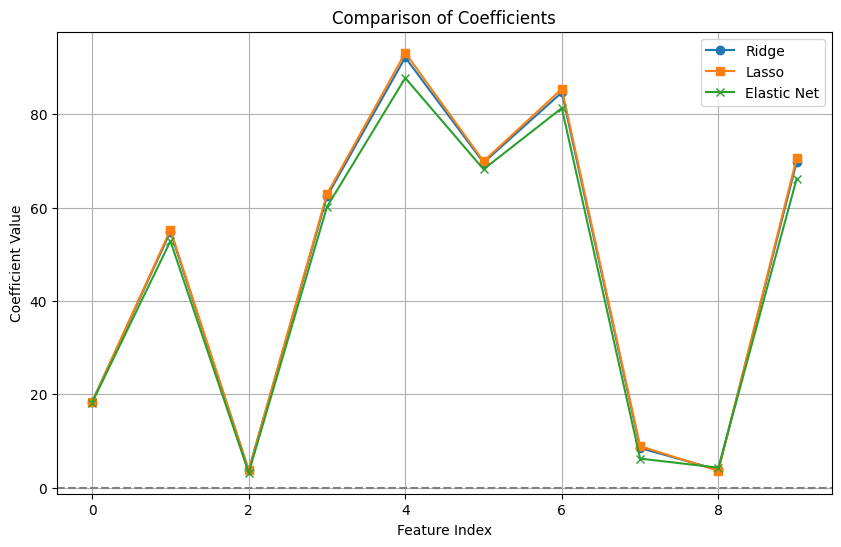

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ridge.coef_, 'o-', label='Ridge')
plt.plot(lasso.coef_, 's-', label='Lasso')
plt.plot(elastic.coef_, 'x-', label='Elastic Net')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


---

7. When should we use Elastic Net instead of Lasso or Ridge?

- You should choose **Elastic Net** when:

 🔹 1. **You have many features and some are correlated.**

* **Lasso** may arbitrarily select one and ignore others.
* **Elastic Net** handles multicollinearity better by **balancing L1 and L2**, allowing **group selection**.

 🔹 2. **You suspect only a few features are important, but not sure which.**

* Lasso is good for sparse models (feature selection), but **unstable with correlated features**.
* Elastic Net combines **sparsity (from L1)** with **stability (from L2)**.

 🔹 3. **You want a compromise between feature selection and coefficient shrinkage.**

* L1 encourages sparsity (zero coefficients).
* L2 shrinks large weights (but keeps all features).
* Elastic Net lets you **control the trade-off** with `l1_ratio`.

 🔹 4. **In high-dimensional data (p > n)**:

* When number of features **exceeds** number of samples, Elastic Net generally **outperforms** Lasso or Ridge individually.

 **Use Elastic Net When:**

| Condition                            | Elastic Net Recommended? |
| ------------------------------------ | ------------------------ |
| High multicollinearity               | ✅ Yes                    |
| Sparse solution + grouped features   | ✅ Yes                    |
| p >> n (more features than samples)  | ✅ Yes                    |
| Need balance of stability + sparsity | ✅ Yes                    |

---

8. What is the impact of the regularization parameter (λ) in Logistic Regression?

- **Impact of the Regularization Parameter (λ) in Logistic Regression:**

  - Lambda (also called **alpha** in some libraries) is the **regularization parameter** that controls **how much penalty** is applied to the model's coefficients during training.

🔹 **Impact on Model Behavior:**

| **λ Value**     | **Impact on Model**                                                    |
| --------------- | ---------------------------------------------------------------------- |
| **λ = 0**       | No regularization → behaves like standard logistic regression          |
| **Small λ**     | Slight penalty → allows complex model with some overfitting            |
| **Large λ**     | Heavy penalty → shrinks coefficients significantly (underfitting risk) |
| **Too large λ** | Coefficients approach 0 → model may lose predictive power              |


 🔹 **Trade-off Controlled by λ:**

* **Low λ** → Model fits training data well, but risks **overfitting**.
* **High λ** → Model is simpler and may generalize better, but risks **underfitting**.


 🔹 **Graphical Intuition:**

As λ increases:

* Coefficient magnitudes decrease.
* Decision boundary becomes **less flexible**.
* Model becomes more **biased** but **less variable**.

🔹 **In Practice:**

* You use techniques like **cross-validation** to find the **optimal λ**.

* In `scikit-learn`, regularization strength is set using `C = 1/λ`

  (So a **smaller C** means **stronger regularization**).

---

9. What are the key assumptions of Logistic Regression?

- **Key Assumptions of Logistic Regression:**

While logistic regression is flexible and widely used, it relies on several assumptions for reliable results:


 🔹 **1. Linearity of the Logit**

* The **log-odds (logit)** of the outcome must be a **linear combination** of the input features:

  $$
  \log\left(\frac{P(y=1)}{1 - P(y=1)}\right) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n
  $$

*  **Note**: Not linear relationship between $x$ and $y$, but between $x$ and **log-odds of y**.


 🔹 **2. Independence of Observations**

* Each observation should be **independent** of the others.

* Common violation: repeated measures on the same subject.


 🔹 **3. No or Little Multicollinearity**

* Independent variables should **not be highly correlated** with each other.

* Detect using **VIF (Variance Inflation Factor)**.


 🔹 **4. Large Sample Size**

* Logistic regression uses **maximum likelihood estimation (MLE)**, which works best with **large datasets**.


 🔹 **5. Binary or Categorical Outcome Variable**

* Standard logistic regression assumes the dependent variable is **binary (0 or 1)**.


 🔹 **6. Relevant Variables Included**

* Omitted important variables can lead to **biased estimates**.


- Summary Table:

| Assumption                   | Description                                          |
| ---------------------------- | ---------------------------------------------------- |
| Linearity in log-odds        | Logit is a linear function of predictors             |
| Independence of observations | No correlated or repeated samples                    |
| No multicollinearity         | Features should not be strongly correlated           |
| Sufficient sample size       | Large data needed for stable estimation              |
| Binary output                | Target variable must be categorical (usually binary) |

---









In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Choose two continuous predictors
X = df[['mean radius', 'mean texture']]
y = df['target']

# Add interaction terms for test
df['mean radius_log'] = df['mean radius'] * np.log(df['mean radius'] + 1)
df['mean texture_log'] = df['mean texture'] * np.log(df['mean texture'] + 1)

# Fit logistic regression with interaction terms
X_test = sm.add_constant(df[['mean radius', 'mean radius_log', 'mean texture', 'mean texture_log']])
logit = sm.Logit(y, X_test).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.240299
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            4
Date:                Sat, 10 May 2025   Pseudo R-squ.:                  0.6361
Time:                        14:36:37   Log-Likelihood:                -136.73
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                3.875e-102
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.9910     13.912      1.509      0.131      -6.276      48.258
mean radius

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(df[['mean radius', 'mean texture']])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


        feature        VIF
0         const  28.464699
1   mean radius   1.117112
2  mean texture   1.117112


---

10. What are some alternatives to Logistic Regression for classification tasks?

- **Alternatives to Logistic Regression for Classification Tasks:**

 - While logistic regression is widely used for binary classification due to its simplicity and interpretability, there are several other algorithms that can outperform it, especially when data is complex or non-linear.


 🔹 1. **Decision Trees**

* Models decision-making with tree-like structures.

* **Pros:** Handles non-linearity, no need for feature scaling.

* **Cons:** Can overfit on training data.


 🔹 2. **Random Forest**

* Ensemble of decision trees (bagging).

* **Pros:** High accuracy, reduces overfitting.

* **Cons:** Less interpretable than logistic regression.

 🔹 3. **Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)**

* Builds trees sequentially to reduce errors.

* **Pros:** High performance in real-world competitions.

* **Cons:** Longer training time, sensitive to hyperparameters.

 🔹 4. **Support Vector Machines (SVM)**

* Finds optimal hyperplane to separate classes.

* **Pros:** Effective in high-dimensional space.

* **Cons:** Can be slow on large datasets, needs feature scaling.

 🔹 5. **K-Nearest Neighbors (KNN)**

* Classifies based on majority label of nearest neighbors.

* **Pros:** Simple, non-parametric.

* **Cons:** Computationally expensive, sensitive to noisy data.

 🔹 6. **Naive Bayes**

* Based on Bayes’ Theorem with independence assumptions.

* **Pros:** Fast, works well with text data.

* **Cons:** Strong (and often unrealistic) assumptions of independence.

 🔹 7. **Neural Networks / Deep Learning**

* Useful for large and complex datasets.

* **Pros:** Handles non-linear and high-dimensional data well.

* **Cons:** Requires more data, longer training, less interpretable.

- Summary Table:

| Algorithm           | Handles Non-Linearity | Good for Large Data | Feature Scaling Needed | Interpretability |
| ------------------- | --------------------- | ------------------- | ---------------------- | ---------------- |
| Logistic Regression | ❌ No                  | ✅ Yes               | ✅ Yes                  | ✅ High           |
| Decision Tree       | ✅ Yes                 | ✅ Yes               | ❌ No                   | ✅ Medium         |
| Random Forest       | ✅ Yes                 | ✅ Yes               | ❌ No                   | ❌ Low            |
| Gradient Boosting   | ✅ Yes                 | ✅ Yes               | ❌ No                   | ❌ Low            |
| SVM                 | ✅ Yes                 | ❌ No (slower)       | ✅ Yes                  | ❌ Medium         |
| KNN                 | ✅ Yes                 | ❌ No (slow)         | ✅ Yes                  | ✅ Medium         |
| Naive Bayes         | ❌ No (independence)   | ✅ Yes               | ✅ Sometimes            | ✅ Medium         |
| Neural Network      | ✅ Yes                 | ✅ Yes               | ✅ Yes                  | ❌ Low            |

---

11. What are Classification Evaluation Metrics?

- **Classification Evaluation Metrics:**

 - Classification models are evaluated using metrics that measure **how well the model predicts categorical outcomes**, especially when distinguishing between two or more classes.

🔹 **1. Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* Measures overall correctness.

* **Best when classes are balanced.**

* **Not reliable for imbalanced datasets.**


 🔹 **2. Precision (Positive Predictive Value)**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* Measures how many **predicted positives** are actually correct.

* Useful when **false positives are costly** (e.g., spam filters).


 🔹 **3. Recall (Sensitivity or True Positive Rate)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* Measures how many **actual positives** were correctly predicted.

* Useful when **false negatives are costly** (e.g., disease detection).


 🔹 **4. F1-Score**

$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* Harmonic mean of precision and recall.

* Best when **you need a balance** between precision and recall.


 🔹 **5. Confusion Matrix**

A 2x2 table that shows:

* **True Positives (TP)**

* **False Positives (FP)**

* **True Negatives (TN)**

* **False Negatives (FN)**

```plaintext
               Actual
               1      0
Predicted 1   TP     FP
          0   FN     TN
```


 🔹 **6. ROC Curve (Receiver Operating Characteristic)**

* Plots **True Positive Rate (Recall)** vs **False Positive Rate**.

* AUC (Area Under Curve) closer to 1 = better model.


 🔹 **7. Log Loss (Binary Cross-Entropy)**

$$
\text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(p_i) + (1 - y_i)\log(1 - p_i)]
$$

* Evaluates **probabilistic outputs**.

* Lower log loss = better model.


- Summary Table:

| Metric    | Best For                                     | Range      |
| --------- | -------------------------------------------- | ---------- |
| Accuracy  | Balanced classes                             | 0 to 1     |
| Precision | False positive critical problems             | 0 to 1     |
| Recall    | False negative critical problems             | 0 to 1     |
| F1-Score  | When precision and recall are both important | 0 to 1     |
| ROC-AUC   | Overall model discrimination                 | 0.5 to 1   |
| Log Loss  | Probability-based scoring                    | 0 (best) ↑ |

---





In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, log_loss
)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/Log Loss

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Log Loss:", log_loss(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9707602339181286
Precision: 0.9724770642201835
Recall: 0.9814814814814815
F1 Score: 0.9769585253456221
ROC AUC Score: 0.9976484420928865
Log Loss: 0.07504890183228849
Confusion Matrix:
 [[ 60   3]
 [  2 106]]


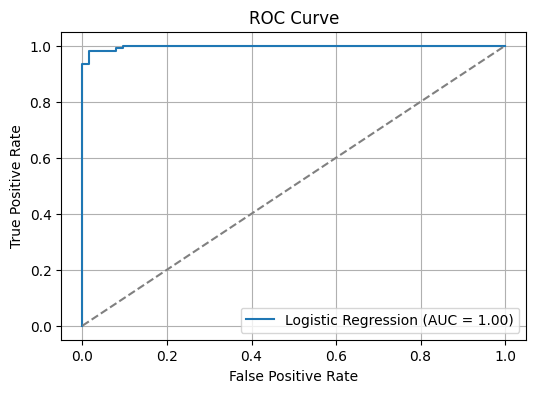

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


---

12. How does class imbalance affect Logistic Regression?

- Class imbalance occurs when the number of samples in one class **significantly outweighs** the number in another.

**Example:**

* Class 0: 950 samples

* Class 1: 50 samples

  Here, Class 1 is the **minority** class.


 🔹 **Impact on Logistic Regression:**

| Issue                         | Effect                                                                            |
| ----------------------------- | --------------------------------------------------------------------------------- |
| **Biased predictions**        | Logistic Regression will **favor the majority class** to maximize accuracy.       |
| **Misleading accuracy**       | You may see high accuracy (e.g., 95%), but **low precision/recall for minority**. |
| **Poor recall (sensitivity)** | Model may **miss** many positive cases (high false negatives).                    |
| **Bad decision boundary**     | Class 1 (minority) points may be treated as noise.                                |


 🔹 **Example Scenario:**

In disease prediction, if:

* 98% = Healthy
* 2% = Sick

- Logistic regression may predict all as healthy for 98% accuracy but **miss all actual cases**, which is catastrophic.


 🔹 **How to Handle Class Imbalance:**

1. **Resampling Techniques**

   * **Oversample** minority (e.g., SMOTE)
   
   * **Undersample** majority
  

2. **Use Class Weights**

   In `scikit-learn`:

   ```python
   LogisticRegression(class_weight='balanced')
   ```

3. **Evaluation Metrics Beyond Accuracy**

   * Use **F1 Score**, **Precision-Recall**, **ROC AUC** instead of just accuracy.

4. **Threshold Tuning**

   * Change decision threshold (default is 0.5) to improve recall or precision for minority class.

- Summary:

 - Class imbalance causes logistic regression to be **biased toward the majority class**, leading to **poor detection of the minority class**. You must address it via **resampling, weighting, and smarter metrics**.




In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------- Without Class Weights ------------
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

print("🚫 Without Class Weights:")
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default, digits=3))

# ----------- With class_weight='balanced' ------------
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

print("\n✅ With class_weight='balanced':")
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced, digits=3))


🚫 Without Class Weights:
[[270   1]
 [  2  27]]
              precision    recall  f1-score   support

           0      0.993     0.996     0.994       271
           1      0.964     0.931     0.947        29

    accuracy                          0.990       300
   macro avg      0.978     0.964     0.971       300
weighted avg      0.990     0.990     0.990       300


✅ With class_weight='balanced':
[[267   4]
 [  1  28]]
              precision    recall  f1-score   support

           0      0.996     0.985     0.991       271
           1      0.875     0.966     0.918        29

    accuracy                          0.983       300
   macro avg      0.936     0.975     0.954       300
weighted avg      0.985     0.983     0.984       300



---

13. What is Hyperparameter Tuning in Logistic Regression?

- **Hyperparameter tuning** is the process of **optimizing model parameters that are not learned from the data directly**, but set **before training**.

- In **Logistic Regression**, these include parameters like:

| Hyperparameter | Description                                                                      |
| -------------- | -------------------------------------------------------------------------------- |
| `C`            | **Inverse** of regularization strength (i.e., smaller = stronger regularization) |
| `penalty`      | Type of regularization (`'l1'`, `'l2'`, `'elasticnet'`, `'none'`)                |
| `solver`       | Optimization algorithm (`'liblinear'`, `'lbfgs'`, `'saga'`, etc.)                |
| `class_weight` | Handles class imbalance (`None` or `'balanced'`)                                 |
| `max_iter`     | Maximum number of iterations for convergence                                     |


 🔹 **Why It Matters:**

* Choosing the right hyperparameters can **significantly improve performance**, especially on:

  * **Imbalanced datasets**

  * **High-dimensional data**
  
  * **Noisy features**


 🔹 **Common Hyperparameter Tuning Methods:**

1. **Grid Search**

   * Tries **all combinations** of specified hyperparameters.
   * Very thorough, but slow.

2. **Random Search**

   * Samples random combinations within a specified space.
   * Faster, good for large search spaces.

3. **Bayesian Optimization (e.g., Optuna, Hyperopt)**

   * More advanced; learns from past evaluations to decide next steps.

 **Example: Grid Search for Logistic Regression in scikit-learn**

- Summary: Hyperparameter tuning helps you **find the best version of your model** by adjusting parameters like `C`, `penalty`, and `solver` — leading to better generalization and performance on unseen data.




In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# Generate synthetic regression data if X_train and y_train are not available
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model and hyperparameters to search
log_reg = LogisticRegression(max_iter=1000)
params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports both l1 and l2
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(log_reg, params, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.9083768083768085


---

14. What are different solvers in Logistic Regression? Which one should be used?

- **Different Solvers in Logistic Regression (scikit-learn):**

 - The **solver** in logistic regression determines the algorithm used to **optimize the cost function** during training. Different solvers are better suited for different types of problems (e.g., dataset size, regularization type, sparsity).

 🔹 **1. `liblinear`**

* Uses **coordinate descent algorithm**.

* Supports **L1 and L2 regularization**.

* **Good for small to medium-sized datasets**.

* Only works for **binary classification** (not multinomial).

Use when:

* You want **L1 regularization** (sparse model).

* Dataset is **small to medium**.

 🔹 **2. `lbfgs` (Limited-memory BFGS)**

* Quasi-Newton method.

* Supports **only L2 regularization**.

* Handles **large datasets** efficiently.

* Supports **multinomial loss** (multi-class classification).

Use when:

* Dataset is **large**.

* You want **multi-class classification**.

* You're okay with **L2 only**.

 🔹 **3. `saga`**

* Handles **L1, L2, and Elastic Net regularization**.

* Scales well for **large and sparse datasets**.

* Supports **multinomial** and **binary** classification.

Use when:

* Dataset is **large and high-dimensional** (e.g., text).

* You want to use **Elastic Net** or **L1 with multi-class**.


 🔹 **4. `newton-cg`**

* Newton’s method using conjugate gradient.

* Supports **only L2 regularization**.

* Can handle **multinomial classification**.

Use when:

* You want **high precision**, **multi-class**, and have **sufficient computation**.

- **Summary Table:**

| Solver      | Supports L1 | Supports L2 | Multi-class | Suitable For               |
| ----------- | ----------- | ----------- | ----------- | -------------------------- |
| `liblinear` | ✅ Yes       | ✅ Yes       | ❌ No        | Small datasets             |
| `lbfgs`     | ❌ No        | ✅ Yes       | ✅ Yes       | Large datasets             |
| `saga`      | ✅ Yes       | ✅ Yes       | ✅ Yes       | Large, sparse, text data   |
| `newton-cg` | ❌ No        | ✅ Yes       | ✅ Yes       | High-precision multi-class |


* **For default L2 binary classification**: `lbfgs` is usually the best.

* **For sparse models or L1 penalty**: use `liblinear` or `saga`.

* **For Elastic Net or large text data**: use `saga`.

---

15. How is Logistic Regression extended for multiclass classification?

- Logistic Regression is naturally a **binary classifier**, but it can be extended to handle **multiclass classification** using strategies like:


 🔹 **1. One-vs-Rest (OvR) / One-vs-All**

* Trains **one binary classifier per class**.

* For class $i$, the model predicts:

  $$
  \text{class } i \text{ vs. all other classes}
  $$
* During prediction, the model with the **highest probability** wins.

 **Default in scikit-learn**:

```python
LogisticRegression(multi_class='ovr')
```


 🔹 **2. Multinomial Logistic Regression (Softmax Regression)**

* A **generalization of logistic regression** for **multiple classes**.

* Uses the **softmax function** instead of sigmoid.

$$
P(y = k | x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^K e^{\theta_j^T x}}
$$

* All classes are handled **simultaneously**, not one-vs-all.

 In scikit-learn:

```python
LogisticRegression(multi_class='multinomial', solver='lbfgs' or 'saga')
```

 🔹 **Comparison:**

| Strategy    | Algorithm Type  | Pros                           | Cons                                    |
| ----------- | --------------- | ------------------------------ | --------------------------------------- |
| One-vs-Rest | Multiple binary | Simple, interpretable          | May suffer from inconsistencies         |
| Multinomial | True multiclass | Considers all classes together | Needs proper solver (e.g., lbfgs, saga) |

---






In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration if not already loaded
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Multiclass Logistic Regression using softmax (multinomial)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---

16. What are the advantages and disadvantages of Logistic Regression?

- **Advantages and Disadvantages of Logistic Regression:**

      - **Advantages:**

| Feature                                      | Explanation                                                              |
| -------------------------------------------- | ------------------------------------------------------------------------ |
| ✅ **Simple and Interpretable**               | Easy to understand; coefficients show impact of features on the outcome. |
| ✅ **Efficient to Train**                     | Fast to train even on large datasets.                                    |
| ✅ **Works Well for Linearly Separable Data** | Effective when the relationship between features and log-odds is linear. |
| ✅ **Probabilistic Output**                   | Predicts **class probabilities**, not just class labels.                 |
| ✅ **Regularization Available**               | Supports **L1, L2, and ElasticNet** to reduce overfitting.               |
| ✅ **Handles Categorical Features**           | Works well with one-hot encoded variables.                               |
| ✅ **Baseline for Classification**            | Often used as a benchmark model.                                         |

     - **Disadvantages:**

| Feature                                         | Explanation                                                             |
| ----------------------------------------------- | ----------------------------------------------------------------------- |
| ❌ **Assumes Linear Relationship (in log-odds)** | Cannot capture non-linear relationships between features and target.    |
| ❌ **Not Great with Complex Patterns**           | Struggles on datasets with high interaction or non-linearity.           |
| ❌ **Sensitive to Outliers**                     | Outliers can disproportionately influence model coefficients.           |
| ❌ **Needs Feature Engineering**                 | Requires scaling and transformation for best performance.               |
| ❌ **Limited to Binary (without extension)**     | Needs modification for multiclass problems (OvR or Multinomial).        |
| ❌ **Less Flexible than Tree-Based Models**      | Can't automatically capture interactions or handle missing values well. |


- Summary Table:

| Criteria               | Logistic Regression          |
| ---------------------- | ---------------------------- |
| Interpretability       | ✅ High                       |
| Speed                  | ✅ Fast                       |
| Non-linear capability  | ❌ Limited                    |
| Multiclass Support     | ✅ With OvR or Multinomial    |
| Regularization         | ✅ L1, L2, ElasticNet         |
| Handles outliers well  | ❌ No                         |
| Feature scaling needed | ✅ Yes (for best performance) |

---

17. What are some use cases of Logistic Regression?

- **Use Cases of Logistic Regression:**

 - Logistic Regression is widely used for **classification tasks** where the goal is to predict **binary or multiclass outcomes** based on input features. Here are some common real-world applications:


 🔹 **1. Healthcare**

* **Disease Diagnosis:**
  Predict if a patient has a disease (e.g., diabetes: yes or no).

* **Test Result Prediction:**
  Classify whether a lab test result will be positive or negative.


 🔹 **2. Finance**

* **Loan Default Prediction:**
  Will a borrower default on a loan?

* **Fraud Detection:**
  Identify whether a transaction is fraudulent.


 🔹 **3. Marketing**

* **Customer Churn Prediction:**
  Will a customer leave the service (churn) or stay?

* **Ad Click Prediction (CTR):**
  Will a user click on an ad?


 🔹 **4. Human Resources**

* **Employee Attrition:**
  Predict if an employee will quit.

* **Hiring Decisions:**
  Predict if a candidate is likely to be hired based on application features.


 🔹 **5. E-Commerce**

* **Purchase Likelihood:**
  Estimate if a user will buy a product after viewing it.

* **Review Sentiment (Binary):**
  Classify a product review as positive or negative.


 🔹 **6. Email & Text Classification**

* **Spam Detection:**
  Classify emails as spam or not spam.

* **Toxic Comment Classification:**
  Detect offensive or inappropriate comments.


 🔹 **7. Insurance**

* **Claim Approval:**
  Will a customer file a claim?
  
* **Policy Risk Classification:**
  Classify risk level based on demographic and historical data.


- Summary:

| Domain     | Logistic Regression Use Case                   |
| ---------- | ---------------------------------------------- |
| Healthcare | Disease prediction, test result classification |
| Finance    | Credit scoring, fraud detection                |
| Marketing  | Churn prediction, ad click prediction          |
| HR         | Attrition modeling, candidate screening        |
| E-Commerce | Purchase prediction, sentiment analysis        |
| NLP/Text   | Spam filtering, comment moderation             |
| Insurance  | Risk modeling, claim likelihood                |

---

18. What is the difference between Softmax Regression and Logistic Regression?

- **Difference Between Softmax Regression and Logistic Regression:**


| Feature                    | **Logistic Regression**               | **Softmax Regression** (Multinomial Logistic)     |         |                                                                  |
| -------------------------- | ------------------------------------- | ------------------------------------------------- | ------- | ---------------------------------------------------------------- |
| 🔢 **Use Case**            | Binary classification (2 classes)     | Multiclass classification (3 or more classes)     |         |                                                                  |
| 🔣 **Output**              | Single probability (e.g., $P(y = 1)$) | Probabilities for **all classes** $P(y = k)$      |         |                                                                  |
| 📐 **Function Used**       | **Sigmoid function**                  | **Softmax function**                              |         |                                                                  |
| 🧮 **Formula**             | ( P(y=1                               | x) = \frac{1}{1 + e^{-\theta^T x}} )              | ( P(y=k | x) = \frac{e^{\theta\_k^T x}}{\sum\_{j=1}^K e^{\theta\_j^T x}} ) |
| 📊 **Classes Handled**     | 2 classes only                        | Multiple classes (K > 2)                          |         |                                                                  |
| 🧠 **Decision Boundary**   | Linear between two classes            | (K-1) boundaries separating K classes             |         |                                                                  |
| 🔄 **Default in sklearn?** | Yes (`multi_class='ovr'`)             | Yes, set `multi_class='multinomial'` with softmax |         |                                                                  |

**Key Insight:**

* **Logistic Regression** is a special case of **Softmax Regression** when the number of classes = 2.

* Softmax generalizes logistic regression to handle **multiple classes** using the **Softmax function**.

---







In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model_ovr.fit(X_train, y_train)
y_pred_ovr = model_ovr.predict(X_test)

print("🔹 One-vs-Rest (OvR) Logistic Regression")
print(confusion_matrix(y_test, y_pred_ovr))
print(classification_report(y_test, y_pred_ovr, target_names=target_names))

model_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model_softmax.fit(X_train, y_train)
y_pred_softmax = model_softmax.predict(X_test)

print("\n🔸 Multinomial (Softmax) Logistic Regression")
print(confusion_matrix(y_test, y_pred_softmax))
print(classification_report(y_test, y_pred_softmax, target_names=target_names))


🔹 One-vs-Rest (OvR) Logistic Regression
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


🔸 Multinomial (Softmax) Logistic Regression
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

- Choosing between **One-vs-Rest (OvR)** and **Softmax (Multinomial Logistic Regression)** for **multiclass classification** depends on several factors, including model interpretability, performance, algorithm support, data characteristics, and use case requirements.


- **Quick Summary:**

| Aspect               | One-vs-Rest (OvR)                                                            | Softmax (Multinomial Logistic Regression)                                             |
| -------------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| **Approach**         | Trains one binary classifier per class                                       | Single model that handles all classes simultaneously                                  |
| **Number of Models** | $k$ binary classifiers (for $k$ classes)                                     | One model for all $k$ classes                                                         |
| **Output**           | $k$ probability scores (pick the highest)                                    | Softmax scores that sum to 1                                                          |
| **Interpretability** | Easier to interpret individual binary classifiers                            | More complex, but mathematically elegant                                              |
| **Training Time**    | Potentially faster (parallelizable)                                          | Can be slower for many classes                                                        |
| **Performance**      | Works well when classes are **not highly correlated**                        | Better when classes are **mutually exclusive and correlated**                         |
| **Use Case**         | Algorithms without native multiclass support (e.g. SVM, Logistic Regression) | Native support for multiclass (e.g. Neural Networks, Multinomial Logistic Regression) |


**When to Use One-vs-Rest (OvR):**

* ✅ You’re using **binary classifiers** that don't support multiclass natively (e.g. SVM, Binary Logistic Regression).

* ✅ You want **model interpretability** and debugging flexibility.

* ✅ You have **imbalanced classes** or **class overlaps**, where treating one class at a time helps.

* ✅ You want to **parallelize** training (each binary classifier can be trained separately).

* ✅ Small number of classes (OvR scales poorly with many classes).

> ⚠️ Limitation: OvR can produce **inconsistent probability estimates** and may give multiple positive outputs (ambiguous class assignment).


**When to Use Softmax / Multinomial Logistic Regression:**

* ✅ You want a **single unified model** that handles all classes.

* ✅ You have **mutually exclusive classes** (only one correct label per sample).

* ✅ You’re using models that natively support softmax (e.g. **Neural Networks**, **Multinomial Logistic Regression**).

* ✅ You need **calibrated probabilities** (Softmax ensures they sum to 1).

* ✅ You're optimizing for **overall multiclass accuracy**.

> ⚠️ Limitation: Less interpretable; harder to diagnose per-class performance without additional analysis.


- Real-World Examples:

| Scenario                                          | Recommended                                           |
| ------------------------------------------------- | ----------------------------------------------------- |
| Logistic regression on 3-class medical diagnosis  | **Softmax (Multinomial)**                             |
| SVM for 5-class image classification              | **OvR** (since SVM is binary)                         |
| Neural network for 10-class digit recognition     | **Softmax**                                           |
| Classifier ensemble where interpretability is key | **OvR**                                               |
| Very large number of classes (e.g., 1000+)        | **OvR or Hierarchical** (depending on compute limits) |


- TL;DR Rule of Thumb:

> * Use **Softmax** when your model natively supports it and you want **joint probability modeling**.

> * Use **One-vs-Rest (OvR)** when you’re working with **binary-only algorithms**, need **interpretability**, or want to handle **non-mutually exclusive** classes.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

import warnings
warnings.filterwarnings("ignore")
# Load dataset
X, y = load_iris(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# One-vs-Rest
ovr_model = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)

print("🔹 One-vs-Rest Classification Report:")
print(classification_report(y_test, y_pred_ovr))

# Softmax (multinomial logistic regression)
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_model.fit(X_train, y_train)
y_pred_softmax = softmax_model.predict(X_test)

print("🔸 Softmax Classification Report:")
print(classification_report(y_test, y_pred_softmax))




🔹 One-vs-Rest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

🔸 Softmax Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---

20. How do we interpret coefficients in Logistic Regression?

- Interpretation of Coefficients in Logistic Regression:

 - In **Logistic Regression**, the coefficients represent the **effect of a one-unit change in a predictor variable on the log-odds of the target outcome**, holding all other variables constant.

- Mathematical Background:

 - The logistic regression equation is:

$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
$$

* $p$ = probability of the positive class (e.g., survived, spam, etc.)
* $\beta_i$ = coefficient for feature $x_i$


Key Interpretations:

1. **Sign of the Coefficient (`+` or `-`)**

* **Positive coefficient (β > 0)**: Increases the log-odds → increases probability of positive class.

* **Negative coefficient (β < 0)**: Decreases the log-odds → decreases probability of positive class.

2. **Magnitude of the Coefficient**

* **Larger absolute value**: Stronger impact on the target variable.
* Small or close-to-zero: Minimal impact.


Converting Log-Odds to Odds Ratio:

- You can exponentiate the coefficient to interpret it in terms of **odds**:

$$
\text{odds ratio} = e^{\beta_i}
$$

* If $e^{\beta_i} = 1.5$, then a 1-unit increase in $x_i$ increases the odds of the event by 50%.
* If $e^{\beta_i} = 0.7$, it decreases the odds by 30%.

Example:

- Suppose you fit a logistic regression to predict survival on the Titanic:

| Feature  | Coefficient (β) | Odds Ratio $e^\beta$ | Interpretation                                                 |
| -------- | --------------- | -------------------- | -------------------------------------------------------------- |
| `Sex`    | -2.5            | 0.08                 | Males have **lower odds** of survival                          |
| `Fare`   | 0.02            | 1.02                 | Every extra unit of fare increases odds by 2%                  |
| `Pclass` | -1.0            | 0.37                 | Higher class number (lower class) **reduces odds** of survival |

Summary:

| Term                       | Meaning                                             |
| -------------------------- | --------------------------------------------------- |
| Coefficient $\beta_i$      | Impact of feature $x_i$ on log-odds of the target   |
| Sign of $\beta_i$          | Indicates direction of impact                       |
| $e^{\beta_i}$ (odds ratio) | Multiplicative effect on odds for a 1-unit increase |
| Larger magnitude           | Stronger impact on prediction                       |



---

# **Practical:**

1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train the Logistic Regression model
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')  # auto chooses 'ovr' or 'multinomial' based on data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


---

2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy.


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize features (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create and train the Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=5000)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L1 Regularization: {accuracy * 100:.2f}%")


Model Accuracy with L1 Regularization: 100.00%


---

3.  Write a Python program to train Logistic Regression with L2 regularization (Ridge) using Logistic Regression(penalty='l2'). Print model accuracy and coefficients.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create and train the Logistic Regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=500)
model.fit(X_train, y_train)

# Step 5: Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L2 Regularization: {accuracy * 100:.2f}%\n")

# Step 6: Print model coefficients
print("Model Coefficients (weights for each class):")
for i, class_label in enumerate(iris.target_names):
    print(f"Class '{class_label}': {model.coef_[i]}")


Model Accuracy with L2 Regularization: 100.00%

Model Coefficients (weights for each class):
Class 'setosa': [-0.96229141  1.02709252 -1.74177531 -1.59749108]
Class 'versicolor': [ 0.48511907 -0.3432642  -0.30050696 -0.66873113]
Class 'virginica': [ 0.47717234 -0.68382832  2.04228227  2.26622221]


---

4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create and train the Logistic Regression model with Elastic Net
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',                  # Required for elasticnet
    l1_ratio=0.5,                   # 0.5 gives equal weight to L1 and L2
    multi_class='multinomial',
    max_iter=5000,
    random_state=42
)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy * 100:.2f}%\n")

# Step 6: Print coefficients
print("Elastic Net Coefficients (for each class):")
for i, class_label in enumerate(iris.target_names):
    print(f"Class '{class_label}': {model.coef_[i]}")


Model Accuracy with Elastic Net Regularization: 100.00%

Elastic Net Coefficients (for each class):
Class 'setosa': [-0.73812464  1.10552218 -1.899812   -1.61268634]
Class 'versicolor': [ 0.03731808  0.          0.         -0.28305643]
Class 'virginica': [ 0.         -0.41619258  2.5791662   2.88430072]


---

5. Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train Logistic Regression with One-vs-Rest
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with One-vs-Rest: {accuracy * 100:.2f}%\n")

# Step 6: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Model Accuracy with One-vs-Rest: 91.11%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



---

6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                 # Regularization strengths
    'penalty': ['l1', 'l2'],                     # L1 = Lasso, L2 = Ridge
    'solver': ['saga'],                          # 'saga' supports both L1 and L2
    'multi_class': ['multinomial']
}

# Step 5: Create GridSearchCV with Logistic Regression
grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Step 6: Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Step 7: Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print results
print("\nBest Hyperparameters:", grid_search.best_params_)
print(f"Test Accuracy with Best Model: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'C': 100, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy with Best Model: 100.00%


---

7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Initialize Stratified K-Fold (e.g., 5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Step 5: Perform cross-validation
accuracies = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

# Step 6: Print results
print("Accuracy for each fold:", accuracies)
print(f"Average Accuracy: {np.mean(accuracies) * 100:.2f}%")


Accuracy for each fold: [1.         0.96666667 0.9        1.         0.9       ]
Average Accuracy: 95.33%


---

8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import kagglehub
import os # Import the os module to list files in the directory

# Step 1: Load the dataset
# Download latest version
path = kagglehub.dataset_download("dragonheir/logistic-regression")

print("Path to dataset files:", path)

# List files in the downloaded directory to find the data file
# Assuming the data file is a CSV and is the first one found,
# but you might need to adjust this based on the actual file name
data_file_path = None
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        data_file_path = os.path.join(path, filename)
        break

if data_file_path is None:
    print("Error: No CSV file found in the downloaded directory.")
else:
    # Step 2: Read the dataset into a pandas DataFrame
    df = pd.read_csv(data_file_path)

    # Step 3: Explore the dataset
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset summary:")
    print(df.info())

    # Step 4: Encode categorical variables if necessary
    # Assuming 'Gender' is a categorical feature and exists in the dataset
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    else:
        print("Warning: 'Gender' column not found in the dataset. Skipping encoding.")


    # Step 5: Define features and target
    # Ensure that the selected features exist in the DataFrame after potential encoding
    selected_features = ['Age', 'EstimatedSalary', 'Gender']
    available_features = [col for col in selected_features if col in df.columns]

    if len(available_features) != len(selected_features):
        missing = set(selected_features) - set(available_features)
        print(f"Error: Missing features in the dataset: {missing}")
    else:
        X = df[available_features]  # Features
        y = df['Purchased']  # Target variable

        # Step 6: Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Step 7: Standardize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Step 8: Train the Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Step 9: Make predictions and evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

        # Step 10: Display the classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

Path to dataset files: /kaggle/input/logistic-regression
First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Model Accuracy: 85.83%

Classification Report:
              precision    recall  f1-score   support



---

9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the model
model = LogisticRegression(max_iter=5000)

# Step 5: Define hyperparameter distributions
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # solvers that support both l1 and l2
    'multi_class': ['ovr', 'multinomial']
}

# Step 6: Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 7: Fit the model
random_search.fit(X_train, y_train)

# Step 8: Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Output results
print("\nBest Hyperparameters:", random_search.best_params_)
print(f"Test Accuracy with Best Model: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': np.float64(1438.44988828766)}
Test Accuracy with Best Model: 100.00%


---

10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_iris()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Step 5: Wrap it in One-vs-One (OvO) classifier
ovo_model = OneVsOneClassifier(log_reg)

# Step 6: Fit the model
ovo_model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = ovo_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print accuracy
print(f"One-vs-One Logistic Regression Accuracy: {accuracy * 100:.2f}%")


One-vs-One Logistic Regression Accuracy: 100.00%


---

11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification.

First 5 records:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Accuracy: 85.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



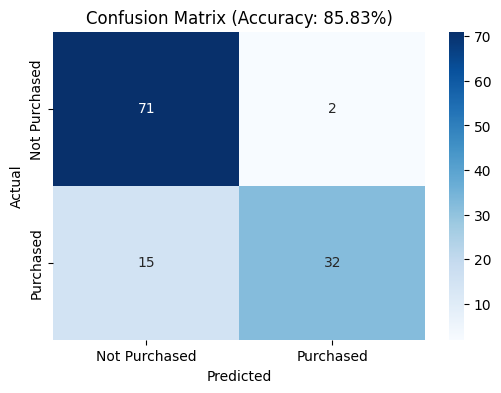

In [ ]:
# Install dependencies (if not installed):
# pip install kagglehub[pandas-datasets] scikit-learn seaborn matplotlib

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "akram24/social-network-ads",
    "Social_Network_Ads.csv"
)

# Preview
print("First 5 records:\n", df.head())

# Preprocessing
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features and Target
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy and Report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
plt.show()


---

12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

In [ ]:
# Install dependencies (run once if needed)
# pip install kagglehub[pandas-datasets] scikit-learn seaborn matplotlib

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset from Kaggle
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "akram24/social-network-ads",
    "Social_Network_Ads.csv"
)

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("Evaluation Metrics:")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

# Optional: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation Metrics:
Precision : 0.9412
Recall    : 0.6809
F1-Score  : 0.7901

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120



---

13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       270
           1       0.73      0.90      0.81        30

    accuracy                           0.96       300
   macro avg       0.86      0.93      0.89       300
weighted avg       0.96      0.96      0.96       300



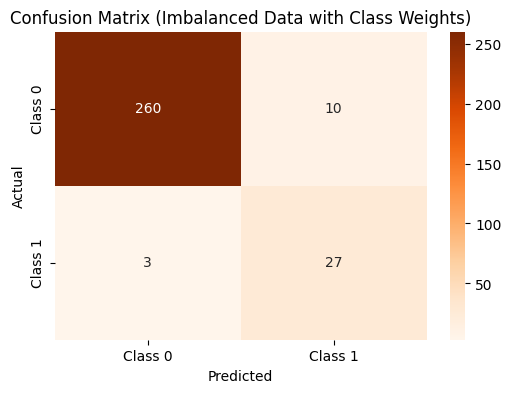

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.90, 0.10], flip_y=0, random_state=42)

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])
df['Target'] = y

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'],
                                                    test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Imbalanced Data with Class Weights)')
plt.show()


---

14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.

100%|██████████| 59.8k/59.8k [00:00<00:00, 695kB/s]

First 5 records:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



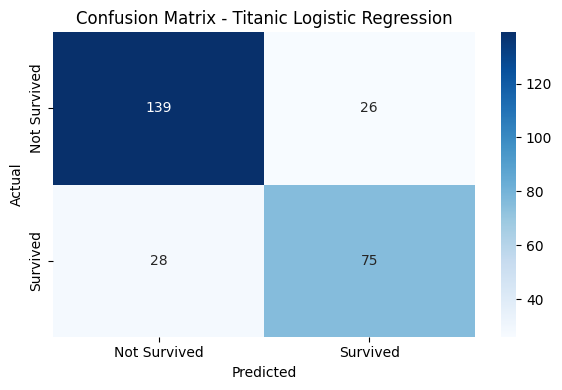

In [ ]:
# Install required libraries if needed:
# pip install kagglehub pandas scikit-learn matplotlib seaborn

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from Kaggle using kagglehub
file_path = "Titanic-Dataset.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "yasserh/titanic-dataset",
    file_path
)

# Display first few records
print("First 5 records:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin' and 'Name', 'Ticket' as they are less useful for basic LR
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# -----------------------------
# Step 2: Model Training
# -----------------------------

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# -----------------------------
# Step 3: Evaluation
# -----------------------------

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Titanic Logistic Regression')
plt.tight_layout()
plt.show()


---

15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling.

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

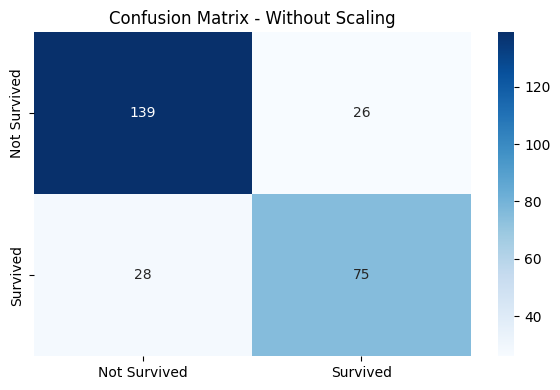

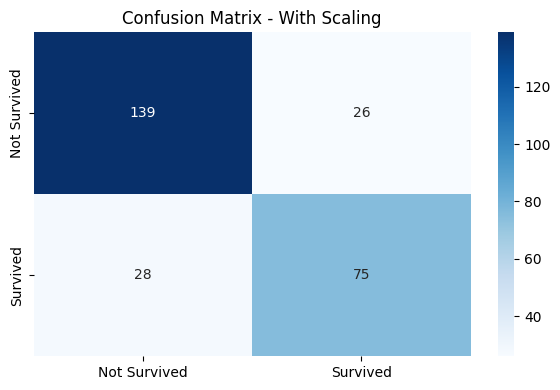

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (you can use any dataset)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset preview:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId' columns as they are less useful
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# Step 2: Logistic Regression Without Scaling
# -----------------------------

# Train Logistic Regression without scaling
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate accuracy without scaling
y_pred = model.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred)
print("\nAccuracy without scaling:", accuracy_no_scaling)

# -----------------------------
# Step 3: Feature Scaling (Standardization)
# -----------------------------

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaled data
model.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy with scaling
y_pred_scaled = model.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
print("\nAccuracy with scaling:", accuracy_with_scaling)

# -----------------------------
# Step 4: Compare Results
# -----------------------------

print("\nClassification Report without scaling:")
print(classification_report(y_test, y_pred))

print("\nClassification Report with scaling:")
print(classification_report(y_test, y_pred_scaled))

# Confusion Matrix - Without Scaling
cm_no_scaling = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_no_scaling, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Without Scaling')
plt.tight_layout()
plt.show()

# Confusion Matrix - With Scaling
cm_with_scaling = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_with_scaling, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - With Scaling')
plt.tight_layout()
plt.show()


---

16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

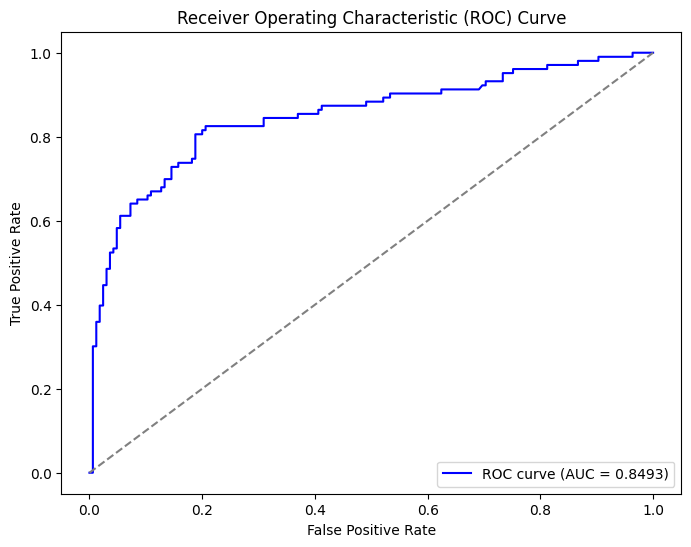

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Titanic dataset (or any dataset of your choice)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset preview:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId' columns as they are less useful
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# Step 2: Logistic Regression Model Training
# -----------------------------

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities (needed for ROC-AUC)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (Survived = 1)

# -----------------------------
# Step 3: Evaluate using ROC-AUC Score
# -----------------------------

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# -----------------------------
# Step 4: Plot ROC Curve
# -----------------------------

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


---

17.  Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy.

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

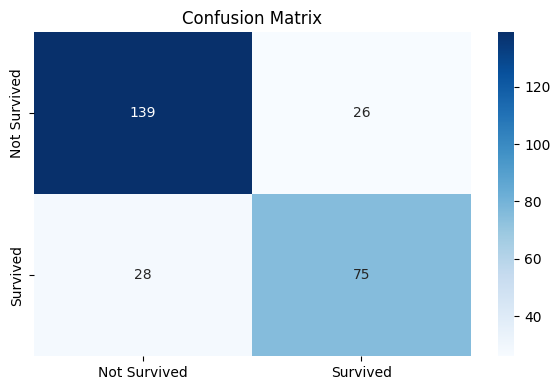

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (or any dataset of your choice)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset preview:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId' columns as they are less useful
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# Step 2: Logistic Regression with Custom Learning Rate (C=0.5)
# -----------------------------

# Initialize the Logistic Regression model with C=0.5
model = LogisticRegression(C=0.5, max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# -----------------------------
# Step 3: Evaluate Model Performance
# -----------------------------

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with C=0.5: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


---

18.  Write a Python program to train Logistic Regression and identify important features based on model
coefficients.

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

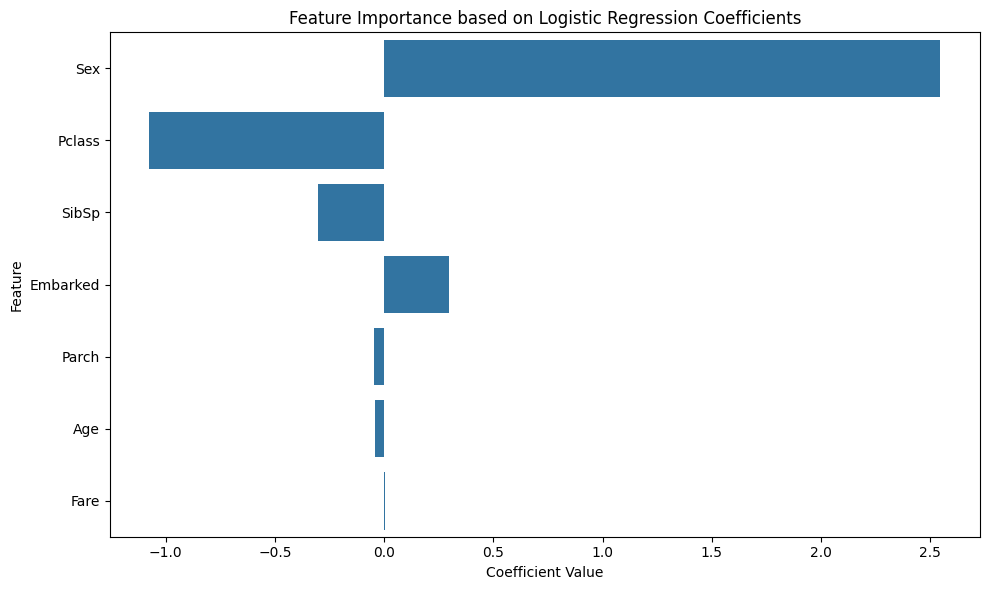

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset (or any dataset of your choice)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset preview:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId' columns as they are less useful
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# Step 2: Logistic Regression Model Training
# -----------------------------

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# -----------------------------
# Step 3: Feature Importance based on Model Coefficients
# -----------------------------

# Get the model coefficients (importance of features)
coefficients = model.coef_[0]

# Get the feature names
feature_names = X.columns

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the magnitude of their coefficients (absolute value)
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the most important features
print("\nMost Important Features based on Logistic Regression Coefficients:")
print(feature_importance[['Feature', 'Coefficient']])

# -----------------------------
# Step 4: Visualizing Feature Importance
# -----------------------------

# Plot the feature importance (sorted by absolute coefficient)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


---

19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

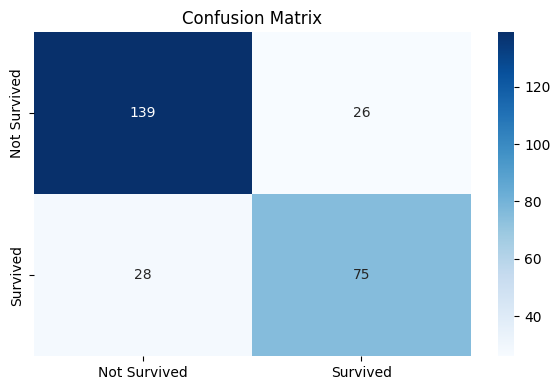

In [ ]:
# Install required libraries if needed:
# pip install scikit-learn seaborn matplotlib pandas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset (or any dataset of your choice)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the dataset
print("Dataset preview:")
print(df.head())

# -----------------------------
# Step 1: Data Preprocessing
# -----------------------------

# Drop rows with missing target values
df.dropna(subset=["Survived"], inplace=True)

# Fill missing age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop 'Cabin', 'Name', 'Ticket', 'PassengerId' columns as they are less useful
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Convert categorical variables into numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# -----------------------------
# Step 2: Logistic Regression Model Training
# -----------------------------

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# -----------------------------
# Step 3: Predict and Evaluate using Cohen's Kappa Score
# -----------------------------

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)
print(f"\nCohen's Kappa Score: {kappa_score:.4f}")

# -----------------------------
# Step 4: Display Additional Evaluation Metrics
# -----------------------------

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


---

20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification.

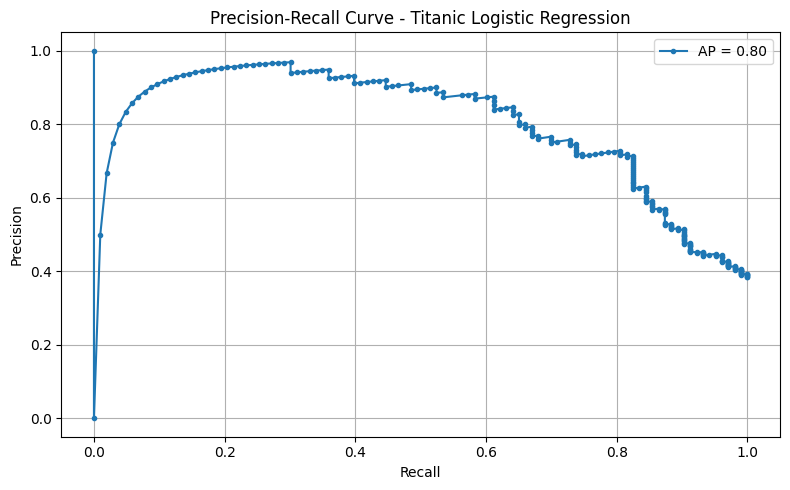


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
# Install required packages if not already installed
# pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# --------------------------------------------
# Step 1: Load Titanic Dataset from URL
# --------------------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --------------------------------------------
# Step 2: Data Preprocessing
# --------------------------------------------

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --------------------------------------------
# Step 3: Train Logistic Regression
# --------------------------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# --------------------------------------------
# Step 4: Precision-Recall Curve
# --------------------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Titanic Logistic Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------
# Step 5: Print classification report
# --------------------------------------------
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


---

21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy.

In [ ]:
# Install required packages if needed
# pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --------------------------------------------
# Step 1: Load Titanic Dataset
# --------------------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --------------------------------------------
# Step 2: Data Preprocessing
# --------------------------------------------

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --------------------------------------------
# Step 3: Train Logistic Regression with Different Solvers
# --------------------------------------------

solvers = ['liblinear', 'saga', 'lbfgs']
accuracy_results = {}

for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=500)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_results[solver] = acc
        print(f"Solver: {solver} | Accuracy: {acc:.4f}")
    except Exception as e:
        accuracy_results[solver] = None
        print(f"Solver: {solver} | Error: {e}")

# --------------------------------------------
# Step 4: Compare Accuracies
# --------------------------------------------
print("\nAccuracy Comparison:")
for solver, acc in accuracy_results.items():
    print(f"{solver:10s}: {'{:.4f}'.format(acc) if acc is not None else 'Error'}")


Solver: liblinear | Accuracy: 0.7910
Solver: saga | Accuracy: 0.6903
Solver: lbfgs | Accuracy: 0.7985

Accuracy Comparison:
liblinear : 0.7910
saga      : 0.6903
lbfgs     : 0.7985


---

22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC).

In [ ]:
# Install required packages if not already installed
# pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, classification_report

# --------------------------------------------
# Step 1: Load the Titanic Dataset
# --------------------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --------------------------------------------
# Step 2: Data Preprocessing
# --------------------------------------------

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------------------------
# Step 3: Train Logistic Regression
# --------------------------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --------------------------------------------
# Step 4: Evaluate using MCC
# --------------------------------------------
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

# Optional: print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Matthews Correlation Coefficient (MCC): 0.5727

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



---

23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

In [ ]:
# Install required packages if not already installed:
# pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --------------------------------------------
# Step 1: Load Titanic Dataset
# --------------------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --------------------------------------------
# Step 2: Data Preprocessing
# --------------------------------------------
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into training and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------------------------
# Step 3: Train on Raw (Unscaled) Data
# --------------------------------------------
model_raw = LogisticRegression(max_iter=500)
model_raw.fit(X_train_raw, y_train)
y_pred_raw = model_raw.predict(X_test_raw)
acc_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on raw data: {acc_raw:.4f}")

# --------------------------------------------
# Step 4: Train on Standardized Data
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

model_scaled = LogisticRegression(max_iter=500)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on standardized data: {acc_scaled:.4f}")

# --------------------------------------------
# Step 5: Comparison
# --------------------------------------------
improvement = acc_scaled - acc_raw
print(f"\nImprovement in accuracy due to scaling: {improvement:.4f}")


Accuracy on raw data: 0.7985
Accuracy on standardized data: 0.7985

Improvement in accuracy due to scaling: 0.0000


---

24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

In [ ]:
# Install required packages if not already installed:
# pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --------------------------------------------
# Step 1: Load Titanic Dataset
# --------------------------------------------
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# --------------------------------------------
# Step 2: Data Preprocessing
# --------------------------------------------
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# --------------------------------------------
# Step 3: Train-Test Split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------------------------
# Step 4: Feature Scaling
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------
# Step 5: Hyperparameter Tuning with GridSearchCV
# --------------------------------------------
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100],
    'penalty': ['l2'],  # using Ridge regularization
    'solver': ['lbfgs'] # solver compatible with l2
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

# --------------------------------------------
# Step 6: Best Parameters & Final Evaluation
# --------------------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Best C value: {grid_search.best_params_['C']}")
print(f"Test Accuracy with best C: {accuracy:.4f}")


Best C value: 0.01
Test Accuracy with best C: 0.7985


---

25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [ ]:
# -----------------------------------------------
# 0.  Install any missing packages (uncomment):
# !pip install pandas scikit-learn joblib
# -----------------------------------------------

import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# 1.  Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df  = pd.read_csv(url)

# 2.  Basic preprocessing  -----------------------
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

df["Sex"]      = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3.  Build a pipeline: scaling ➊ + logistic regression ➋
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500))
])

# 4.  Fit the pipeline
pipeline.fit(X_train, y_train)

# 5.  Evaluate on the test set
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 6.  Save the trained pipeline
model_path = "titanic_logreg_pipeline.joblib"
joblib.dump(pipeline, model_path)
print(f"Model saved to {model_path}")

# 7.  Load the pipeline back from disk
loaded_pipeline = joblib.load(model_path)
print("Model re-loaded from disk.")

# 8.  Make sample predictions with the loaded model
sample = X_test.iloc[:5]          # first five passengers from test set
sample_pred = loaded_pipeline.predict(sample)
print("\nSample predictions (0 = not survived, 1 = survived):")
print(sample_pred.tolist())


Accuracy: 0.7985
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Model saved to titanic_logreg_pipeline.joblib
Model re-loaded from disk.

Sample predictions (0 = not survived, 1 = survived):
[0, 0, 0, 0, 0]
